## Task 2: Prediction using Unsupervised Learning

### Objective: To predict the optimum number of clusters in the famous 'Iris' dataset. 

#### Author: Preethi Evelyn Sadanandan

In [1]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
#loading the dataset
raw_data = pd.read_csv('Iris.csv')

In [3]:
raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
raw_data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [5]:
raw_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data = raw_data.copy()

Text(0.5, 1.0, 'Petal Length vs Sepal Width')

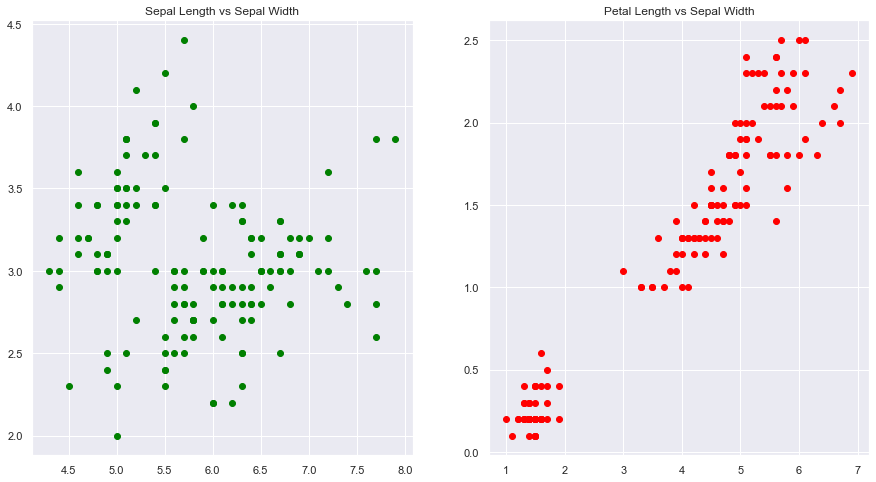

In [7]:
#plotting the data points based on features on a scatter diagram
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize = (15, 8))
ax1.scatter(data['SepalLengthCm'], data['SepalWidthCm'], color = 'green')
ax1.set_title('Sepal Length vs Sepal Width')

ax2.scatter(data['PetalLengthCm'], data['PetalWidthCm'], color = 'red')
ax2.set_title('Petal Length vs Sepal Width')


In [8]:
#selecting the features
x = data.iloc[:, 1:5]
x_scaled = preprocessing.scale(x)

#### Finding the optimum number of clusters

In [9]:
wcss = []
for i in range (1,7):
    kmeans = KMeans(i).fit(x_scaled)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Within-cluster sum of squares')

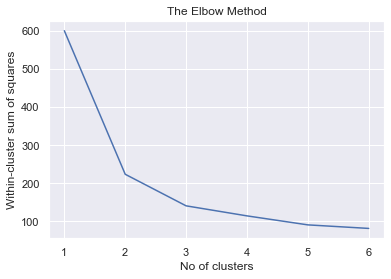

In [10]:
#to plot the Elbow method graph
num_clusters = range(1,7)
plt.plot(num_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Within-cluster sum of squares')

In [11]:
#from the above graph, usign Elbow method we can observe that 3 would be the optimum number of clusters

In [12]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)

KMeans(n_clusters=3)

In [13]:
clusters_new = x.copy()
clusters_new['Cluster Predicted'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster Predicted
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Plotting the resulting clusters predicted

Text(0.5, 1.0, 'Petal Length vs Sepal Width')

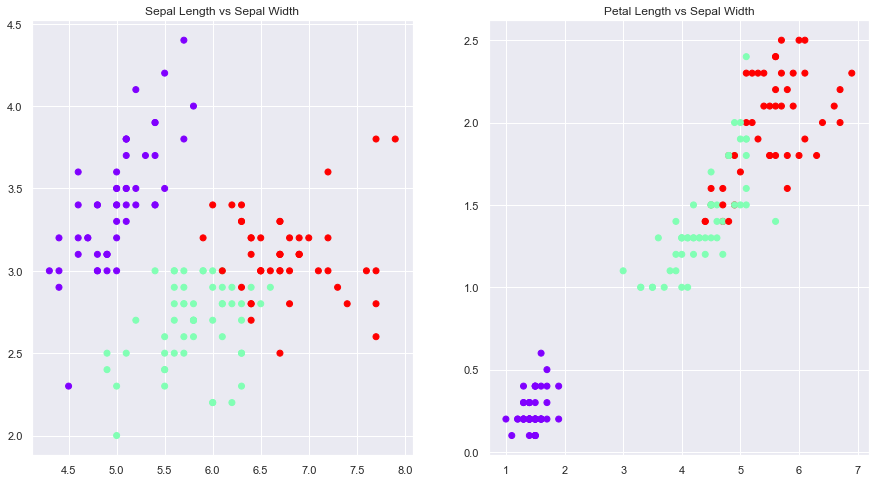

In [14]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize = (15, 8))
ax1.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c = clusters_new['Cluster Predicted'], cmap = 'rainbow')
ax1.set_title('Sepal Length vs Sepal Width')

ax2.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c = clusters_new['Cluster Predicted'], cmap = 'rainbow')
ax2.set_title('Petal Length vs Sepal Width')
